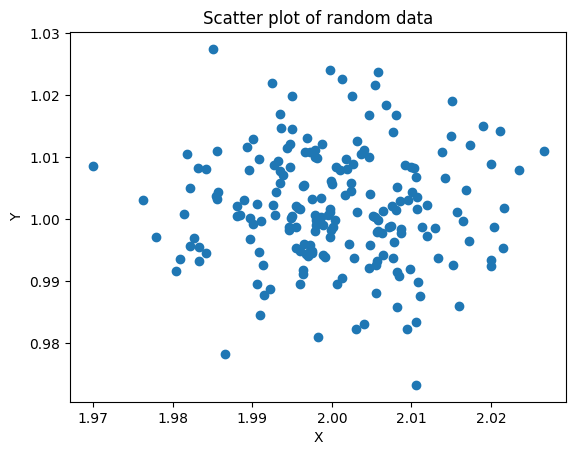

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一些示例数据
# y = wx + b + noise
w_true = 2
b_true = 1
noise = 0.01  # 减少噪声量，使得数据更接近一条直线
data = np.random.randn(200, 2) * noise + np.array([w_true, b_true])

# 绘制散点图
plt.scatter(data[:, 0], data[:, 1])

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of random data')
plt.show()

Epoch 1, Loss: 0.8127963472198015
Epoch 2, Loss: 0.658336269995117
Epoch 3, Loss: 0.5332328424990682
Epoch 4, Loss: 0.43190654606986056
Epoch 5, Loss: 0.34983830418691975
Epoch 6, Loss: 0.28336793506097346
Epoch 7, Loss: 0.22953091028239775
Epoch 8, Loss: 0.18592613908645514
Epoch 9, Loss: 0.15060888151323037
Epoch 10, Loss: 0.12200401446982008
Epoch 11, Loss: 0.09883578242647077
Epoch 12, Loss: 0.0800708996806033
Epoch 13, Loss: 0.06487246659255176
Epoch 14, Loss: 0.05256264449182468
Epoch 15, Loss: 0.04259242458281965
Epoch 16, Loss: 0.03451714256594674
Epoch 17, Loss: 0.027976646944702456
Epoch 18, Loss: 0.02267923654012278
Epoch 19, Loss: 0.018388650837854223
Epoch 20, Loss: 0.014913532947119754
Epoch 21, Loss: 0.012098895227483385
Epoch 22, Loss: 0.009819206956793504
Epoch 23, Loss: 0.007972795755500509
Epoch 24, Loss: 0.006477313075089027
Epoch 25, Loss: 0.005266061514823158
Epoch 26, Loss: 0.0042850201678972764
Epoch 27, Loss: 0.0034904353296707448
Epoch 28, Loss: 0.002846869115

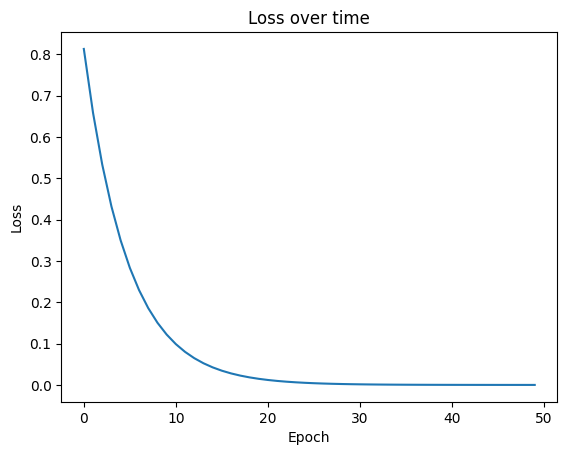

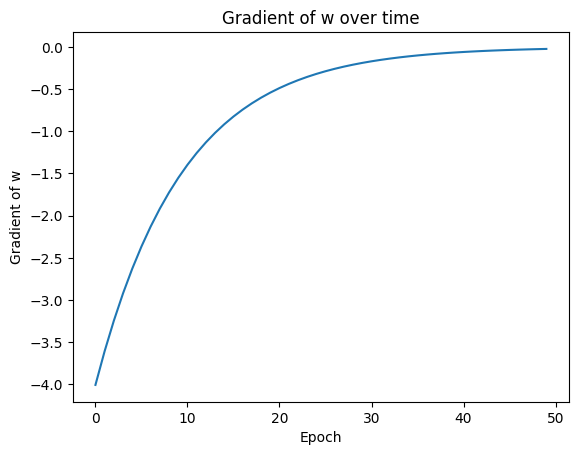

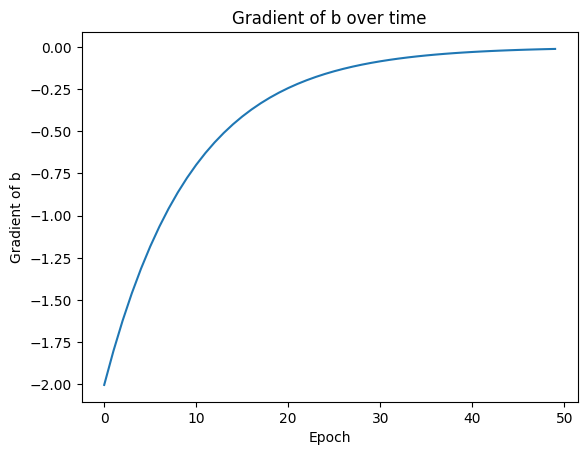

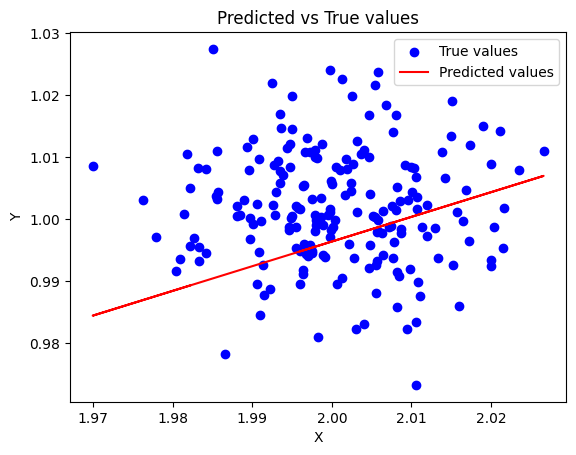

In [52]:

# 定义损失函数
def compute_loss(w, b, points):
    """
    计算损失函数
    :param w: 权重
    :param b: 偏置
    :param points: 数据点
    :return: 损失函数值
    """
    total_loss = 0
    for x, y in points:
        y_hat = w * x + b  # 通过计算得到的预测值
        total_loss += (y_hat - y) ** 2  # 计算预测值与真实值之间的差异,即损失函数
    return total_loss / len(points)  # 通过多个点的损失函数之和来计算平均损失

# 计算梯度


def compute_gradient(w, b, points):
    """
    计算梯度
    :param w: 权重
    :param b: 偏置
    :param points: 数据点
    :return: 梯度
    """
    # 计算梯度,即损失函数的导数,用于更新模型的参数
    dw = 0
    db = 0
    N = float(len(points))
    for x, y in points:
        y_hat = w * x + b  # 计算预测值
        dw += 2 * (y_hat - y) * x  # 对权重 w 的梯度
        db += 2 * (y_hat - y)  # 对偏置 b 的梯度
    return dw / N, db / N

# 训练模型


def train_model(w, b, points, lr, epochs):
    losses = []  # 存储每轮迭代的损失值
    dw_history = []  # 存储每轮迭代的权重梯度
    db_history = []  # 存储每轮迭代的偏置梯度
    for epoch in range(epochs):
        dw, db = compute_gradient(w, b, points)  # 计算梯度
        dw_history.append(dw)
        db_history.append(db)
        w -= lr * dw  # 更新权重
        b -= lr * db  # 更新偏置
        loss = compute_loss(w, b, points)  # 当前损失值
        losses.append(loss)  # 保存损失值
        print(f'Epoch {epoch+1}, Loss: {loss}')
    return w, b, losses, dw_history, db_history  # 返回最优权重和偏置以及所有损失值和梯度历史


# 设置初始权重、偏置、学习率和迭代次数
w, b, losses, dw_history, db_history = train_model(
    0, 0, data, 0.01, 50)  # 训练模型

print(f'Optimal weight: {w}, Optimal bias: {b}')

# 画出损失函数值的变化
plt.figure()
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over time')
plt.show()

# 画出权重 w 的梯度变化
plt.figure()
plt.plot(dw_history)
plt.xlabel('Epoch')
plt.ylabel('Gradient of w')
plt.title('Gradient of w over time')
plt.show()

# 画出偏置 b 的梯度变化
plt.figure()
plt.plot(db_history)
plt.xlabel('Epoch')
plt.ylabel('Gradient of b')
plt.title('Gradient of b over time')
plt.show()

# 画出预测值和真实值
x_values = data[:, 0]
y_true = data[:, 1]
y_pred = w * x_values + b

plt.figure()
plt.scatter(x_values, y_true, label='True values', color='blue')
plt.plot(x_values, y_pred, label='Predicted values', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Predicted vs True values')
plt.show()